<a href="https://colab.research.google.com/github/RojaCM/Sample-files/blob/main/Linear%20Stats%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
from google.colab import files
uploaded = files.upload()

Saving Advertising.csv to Advertising (1).csv


In [15]:
df = pd.read_csv('Advertising.csv',index_col=0)

In [16]:
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [17]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


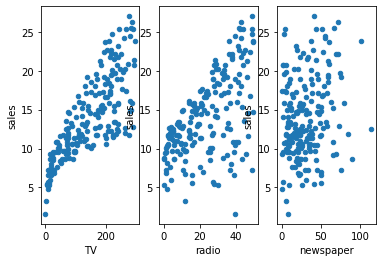

In [25]:
fig,axs=plt.subplots(1,3)
df.plot(kind='scatter',x ='TV',y='sales',ax=axs[0])
df.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
df.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])

In [29]:
features = df[['TV']]
target = df['sales']

In [30]:
lr = LinearRegression()
lr.fit(features,target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lr.coef_

array([0.04753664])

In [32]:
lr.intercept_

7.032593549127695

In [35]:
x_new = pd.DataFrame({'TV':[df.TV.min(),df.TV.max()]})

In [36]:
x_new

,TV
0,0.7
1,296.4


In [39]:
predictions=lr.predict(x_new)

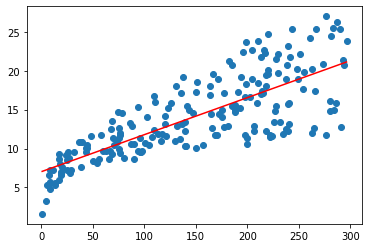

In [41]:
plt.scatter(df['TV'],df['sales'])
plt.plot(x_new,predictions,color='red')

In [44]:
import statsmodels.formula.api as smf

In [48]:
model = smf.ols(formula='sales~TV',data=df).fit()

In [49]:
model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

In [51]:
model.pvalues.loc['TV']<0.05

True

In [53]:
x = df.iloc[:,:-1]
x

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [54]:
y =df.sales

In [56]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [57]:
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
pred=lr.predict(x_test)

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [62]:
r2_score(pred,y_test)

0.8568426043504985

In [64]:
r=mean_squared_error(pred,y_test)

In [65]:
np.sqrt(r)

1.8761223356981576

In [67]:
lr.coef_

array([0.04613207, 0.18409144, 0.00209994])

In [71]:
f1=smf.ols(formula='sales~TV+radio+newspaper',data=df).fit()

In [72]:
f1.pvalues

Intercept    1.267295e-17
TV           1.509960e-81
radio        1.505339e-54
newspaper    8.599151e-01
dtype: float64

In [73]:
f1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           1.58e-96
Time:                        20:15:09   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
f1.pvalues.loc['newspaper']<0.05

False